In [12]:
import os
import tensorflow as tf

In [11]:
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.6.0


In [15]:
!pip3 install matplotlib

  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [22]:
# load data set
cifar10 = tf.keras.datasets.cifar10

# split data for testing / training
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [24]:
# normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# flatten label values
y_train = y_train.flatten()
y_test = y_test.flatten()

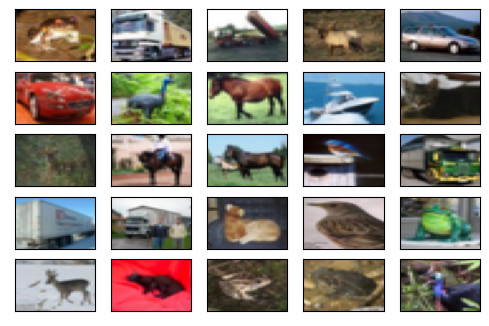

In [31]:
# visualize images
fig, ax = plt.subplots(5, 5, dpi=100)
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        k += 1
plt.show()


In [32]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [33]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [34]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Fit
r = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 5ms/step - loss: 1.2921 - accuracy: 0.5532 - val_loss: 1.0819 - val_accuracy: 0.6328
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8392 - accuracy: 0.7097 - val_loss: 0.7636 - val_accuracy: 0.7429
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6813 - accuracy: 0.7671 - val_loss: 0.7873 - val_accuracy: 0.7311
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5767 - accuracy: 0.8008 - val_loss: 0.7139 - val_accuracy: 0.7603
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4933 - accuracy: 0.8310 - val_loss: 0.6408 - val_accuracy: 0.7890
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4248 - accuracy: 0.8543 - val_loss: 0.6582 - val_accuracy: 0.7916
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3556 - accuracy: 0.8766 - val_loss: 0.6285 - val_accuracy

In [36]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 13s 8ms/step - loss: 0.5462 - accuracy: 0.8249 - val_loss: 0.5168 - val_accuracy: 0.8330
Epoch 2/50
1562/1562 [==============================] - 12s 7ms/step - loss: 0.4318 - accuracy: 0.8596 - val_loss: 0.4548 - val_accuracy: 0.8522
Epoch 3/50
1562/1562 [==============================] - 11s 7ms/step - loss: 0.4089 - accuracy: 0.8655 - val_loss: 0.4876 - val_accuracy: 0.8477
Epoch 4/50
1562/1562 [==============================] - 12s 7ms/step - loss: 0.3852 - accuracy: 0.8714 - val_loss: 0.4537 - val_accuracy: 0.8519
Epoch 5/50
1562/1562 [==============================] - 12s 7ms/step - loss: 0.3655 - accuracy: 0.8768 - val_loss: 0.4392 - val_accuracy: 0.8575
Epoch 6/50
1562/1562 [==============================] - 11s 7ms/step - loss: 0.3482 - accuracy: 0.8819 - val_loss: 0.4494 - val_accuracy: 0.8561
Epoch 7/50
1562/1562 [==============================] - 11s 7ms/step - loss: 0.3336 - accuracy: 0.8868 - val_loss: 0.4733 - val_ac

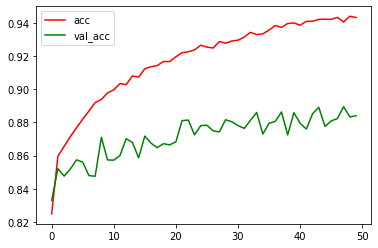

In [37]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

Original label is airplane and predicted label is airplane


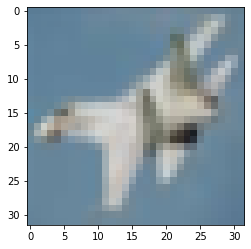

In [43]:
# label mapping
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 10
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [44]:
# save the model
model.save('cifar10.h5')